In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 3


In [6]:
Sigma = np.array ([[5 , 0],[0 , 0.5]])
II = np.array ([[1 , 1]])
# x is a 2 by 1 array starting from np. array ([[0.0] ,[0.0]])
x_init = np.array([[0.0], [0.0]])
max_iter = 30
def func0 ( x ):
    return np.dot( np . dot( x . transpose () , Sigma ) , x )+ math.log ( 1+ math.exp(-np.dot( II , x ) ) )
def First_derivative ( x ):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-( x1+x2 ) )
    return np.array ([[10*x1-ex/( 1+ex )],[x2-ex/( 1+ex )]])
def Second_derivative ( x ):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-( x1+x2 ) )
    ex = ex/( 1+ex ) ** 2
    return np . array ([[10+ex , ex],[ex , 1+ex]])

In [28]:
# Gradient Descent
def gradient_descent(x_init, alpha, max_iter):
    x = x_init
    f_values = [func0(x_init)]
    for i in range(max_iter):
        grad = First_derivative(x)
        x = x - alpha * grad
        f_values.append(func0(x))
    f_values=[item[0][0] for item in f_values]
    return x, f_values
 
# Newton's Method
def newton_method(x_init, max_iter):
    x = x_init
    f_values = [func0(x_init)]
    for i in range(max_iter):
        grad = First_derivative(x)
        hess = Second_derivative(x)
        x = x - np.dot(np.linalg.inv(hess), grad)
        f_values.append(func0(x))
    f_values=[item[0][0] for item in f_values]
    return x, f_values

In [34]:
NM1 = 1
GD01 = 0.1
GD019 = 0.19
GD02 = 0.2

x_nm, fs_nm = newton_method(x_init, max_iter)
x_gd0, fs_gd0 = gradient_descent(x_init, GD01, max_iter)
x_gd1, fs_gd1 = gradient_descent(x_init, GD019, max_iter)
x_gd2, fs_gd2 = gradient_descent(x_init, GD02, max_iter)



C:\Users\JiaYang\AppData\Local\Temp\ipykernel_11860\4189089544.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.dot( np . dot( x . transpose () , Sigma ) , x )+ math.log ( 1+ math.exp(-np.dot( II , x ) ) )


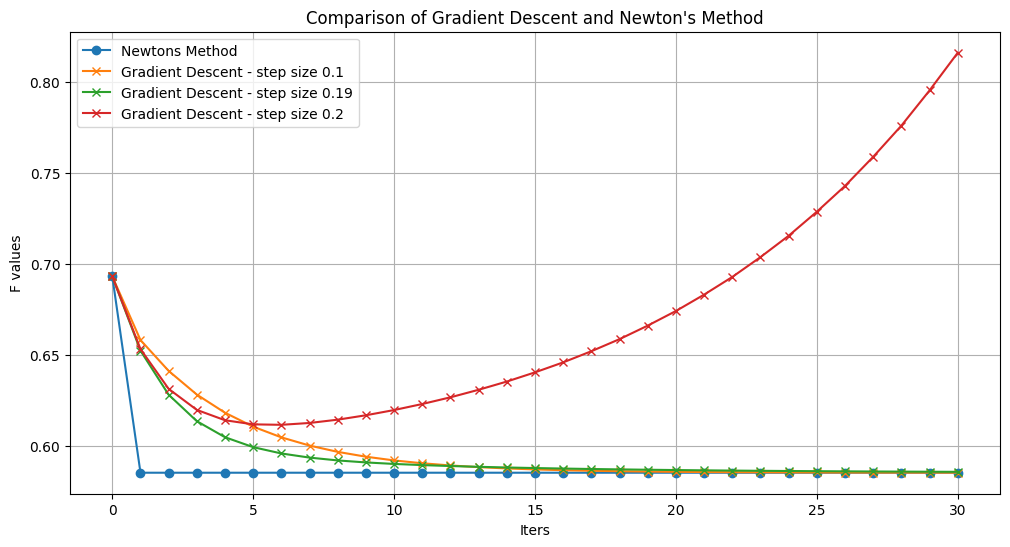

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, max_iter + 1), fs_nm, label='Newtons Method', marker='o')
plt.plot(range(0, max_iter + 1), fs_gd0, label='Gradient Descent - step size 0.1', marker='x')
plt.plot(range(0, max_iter + 1), fs_gd1, label='Gradient Descent - step size 0.19', marker='x')
plt.plot(range(0, max_iter + 1), fs_gd2, label='Gradient Descent - step size 0.2', marker='x')

plt.xlabel('Iters')
plt.ylabel('F values')
plt.title('Comparison of Gradient Descent and Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()

## Problem 5


In [39]:
import numpy as np
import random
import time
from numpy import linalg as LA
import statistics

In [90]:
# initialization
sigma = 1
d = 10
c_square = 100
cov = np.diag ([( 0.25 ** i )* c_square for i in range (1 , d+1 )])
mean = [0]*d
lambda_value = 0.1
beta = 2*(max(LA.eigvals(cov)) + lambda_value)
# coeficient given
opt_w = np . array ([1]*d )

In [91]:
# Sampler function
def sampler ( n ):
    # data X generator
    np.random . seed ( int( time . time ()* 100000 )% 100000 )
    X = np . random . multivariate_normal (mean , cov , n )
    # data Y generator
    Y = np . matmul (X , w )+np . random . normal (0 , sigma ** 2 , n )
    return (X , Y )

In [92]:
def SGD(n_iterations):
    w = np.zeros(d)
    sigma_t_squared = 0
    sampleX, sampleY = sampler(n_iterations)
    w_diffs = []
    for t in range(1, n_iterations + 1):
        Xt = sampleX[t-1]
        Yt = sampleY[t-1]
        gradient = -2 * (Yt - np.dot(w, Xt)) * Xt + 2 * lambda_value * w
        sigma_t_squared += np.sum(gradient**2)
        learning_rate = 1 / np.sqrt(beta * sigma_t_squared)
        w = w - learning_rate * gradient
        w_diffs.append(np.linalg.norm(opt_w - w))
    return w, w_diffs

In [93]:
def AdaGD(n_iterations):
    w = np.zeros(d)
    sigma_t_squared = np.zeros(d)
    sampleX, sampleY = sampler(n_iterations)
    w_diffs = []
    for t in range(1, n_iterations + 1):
        Xt = sampleX[t-1]
        Yt = sampleY[t-1]
        gradient = -2 * (Yt - np.dot(w, Xt)) * Xt + 2 * lambda_value * w
        sigma_t_squared += gradient**2
        learning_rate_diag = 1 / np.sqrt(beta * sigma_t_squared)
        w = w - learning_rate_diag * gradient
        w_diffs.append(np.linalg.norm(opt_w - w))
    return w, w_diffs

In [103]:
w_diffs_rep_SGD = []
w_diffs_rep_ADA = []
for i in range(10):
    w1, w_diffs1 = SGD(n_iterations=1000)
    w_diffs_rep_SGD.append(w_diffs1)
    w2, w_diffs2 = AdaGD(n_iterations=1000)
    w_diffs_rep_ADA.append(w_diffs2)

means1 = np.mean(w_diffs_rep_SGD, axis=0)
stds1 = np.std(w_diffs_rep_SGD, axis=0)

means2 = np.mean(w_diffs_rep_ADA, axis=0)
stds2 = np.std(w_diffs_rep_ADA, axis=0)

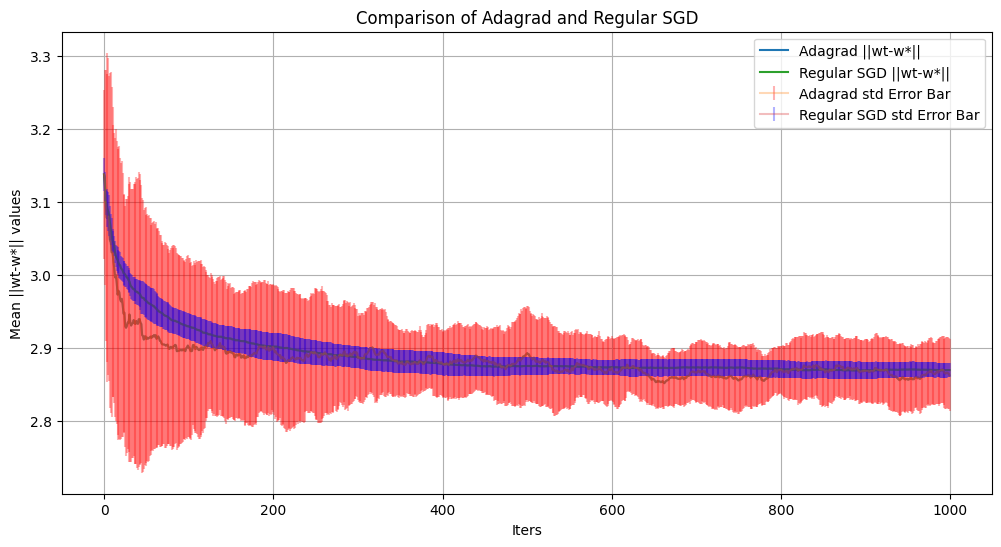

In [118]:
plt.figure(figsize=(12, 6))

plt.plot(range(1000), means2, label='Adagrad ||wt-w*||')
plt.errorbar(range(1000), means2, yerr=stds2,  ecolor='red', alpha=0.3, label='Adagrad std Error Bar')
plt.plot(range(1000), means1, label='Regular SGD ||wt-w*||')
plt.errorbar(range(1000), means1, yerr=stds1, ecolor='blue', alpha=0.3, label='Regular SGD std Error Bar')


plt.xlabel('Iters')
plt.ylabel('Mean ||wt-w*|| values')
plt.title('Comparison of Adagrad and Regular SGD')
plt.legend()
plt.grid(True)
plt.show()